In [45]:
import json

In [46]:
file_p = {
    "exp2 FASO Reason\nDeterministic": "../dataset/experiment2/preprocessed/train_acyclic_reason_deterministic.json",
    "exp2 FASO\nKahn": "../dataset/experiment2/preprocessed/train_acyclic_no_reason_kahn.json",
    "exp2 FASO\nDeterministic": "../dataset/experiment2/preprocessed/train_acyclic_no_reason_deterministic.json",
    "exp2 FASO Reason\nKahn": "../dataset/experiment2/preprocessed/train_acyclic_reason_kahn.json",
    "exp2 Baseline\n(All edges)": "../dataset/experiment2/preprocessed/train_cyclic.json",

    "exp3 FASO Reason\nDeterministic": "../dataset/experiment3/processed/train_acyclic_reason_deterministic.json",
    "exp3 FASO\nKahn": "../dataset/experiment3/processed/train_acyclic_no_reason_kahn.json",
    "exp3 FASO\nDeterministic": "../dataset/experiment3/processed/train_acyclic_no_reason_deterministic.json",
    "exp3 FASO Reason\nKahn": "../dataset/experiment3/processed/train_acyclic_reason_kahn.json",
    "exp3 Baseline\n(All edges)": "../dataset/experiment3/processed/train_cyclic.json",
}

result = dict()

for name, file_path in file_p.items():
    with open(file_path, "r") as f:
        data = json.load(f)
        print(name, len(data["prompt"]))
        result[name] = len(data["prompt"])

exp2 FASO Reason
Deterministic 211410
exp2 FASO
Kahn 168540
exp2 FASO
Deterministic 204085
exp2 FASO Reason
Kahn 191979
exp2 Baseline
(All edges) 211410
exp3 FASO Reason
Deterministic 225000
exp3 FASO
Kahn 207143
exp3 FASO
Deterministic 221960
exp3 FASO Reason
Kahn 218188
exp3 Baseline
(All edges) 225000


In [68]:
import matplotlib.pyplot as plt

def plot_bar_from_dict(
    data: dict[str, int],
    path: str,
    title: str | None = None,
    ylabel: str | None = None,
    ymin: float = 1.4,
    ymax: float = 2.4,
):
    plt.rcParams.update({
        "font.family": "Times New Roman",
        "mathtext.fontset": "stix",
    })

    labels = list(data.keys())
    values = list(data.values())

    fig, ax = plt.subplots(figsize=(6, 4))

    # ---- bar plot ----
    ax.bar(
        labels,
        values,
        edgecolor="black",
        linewidth=0,
    )

    # ---- axes style (line-plot-like) ----
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle="--", alpha=0.4)
    ax.xaxis.grid(False)

    # spine 정리
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # ticks 스타일
    ax.tick_params(axis="x", rotation=0)
    ax.tick_params(axis="both", labelsize=10)
    ax.set_ylim(ymin, ymax)

    offset = max(values) * 0.01  # 1% 띄우기

    for bar in ax.containers[0]:
        h = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            h + offset,
            f"{h:.3f}",
            ha="center",
            va="bottom",
            fontsize=10,
        )

    # labels
    if ylabel:
        ax.set_ylabel(ylabel)

    plt.tight_layout()
    plt.savefig(path)

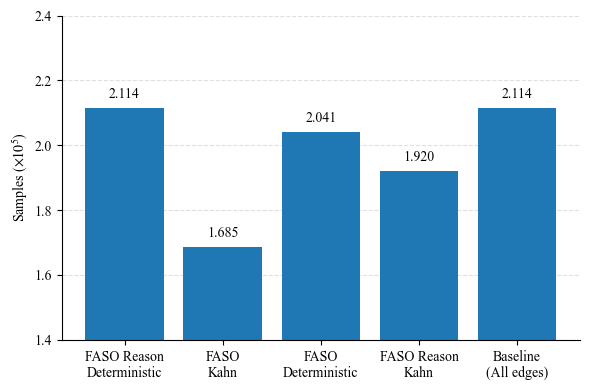

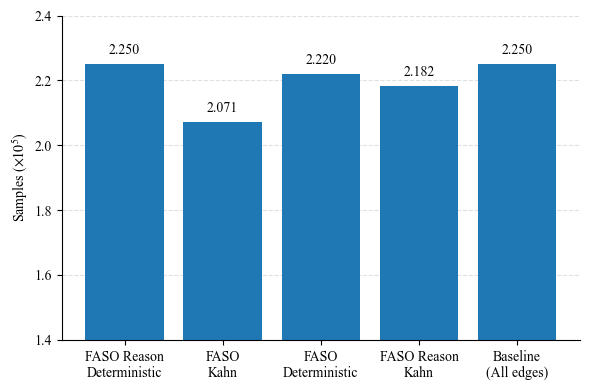

In [69]:
for exp_name, path in [("exp2 ", "../graphs/experiment2/pre.pdf"), ("exp3 ", "../graphs/experiment3/pre.pdf")]:
    drawing = dict()
    for a, b in result.items():
        if a[0:len(exp_name)] == exp_name:
            drawing[a[len(exp_name):]] = b / 10 ** 5
    plot_bar_from_dict(drawing, path, ylabel=r"Samples ($\times 10^5$)")